### Use of Maximum Likelihood Estimate and Maximum a posteriori for Baseball Hit Probability

### Import Relavent Libraries

In [1]:
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset

In [2]:
df= pd.read_csv("baseball_data_2005.csv")
print(df.shape)
df.head()

(929, 16)


,First Name,Last Name,Pitcher?,Season AB,AB(4),AB(5),AB(6),AB(7),AB(8),AB(9-10),H(4),H(5),H(6),H(7),H(8),H(9-10)
0,Brent,Abernathy,0,67,0,0,18,1,34,14,0,0,5,0,8,3
1,Bobby,Abreu,0,588,88,96,103,98,100,103,23,38,29,21,32,25
2,Jeremy,Accardo,1,2,0,0,0,0,0,2,0,0,0,0,0,1
3,Jose,Acevedo,1,8,0,0,0,1,6,1,0,0,0,0,1,0
4,Russ,Adams,0,481,55,67,68,79,104,108,12,17,17,26,28,23


Season AB represents number of batting attempts N. Last 6 column gives number of successful hits at different bases.
SUM of last 6 columns gives total number of hits Nh
For a binomial model, MLE or  $$pr(\theta) =\frac {N_H}{N}$$

### MLE

In [3]:
total_attempts= df['Season AB']
hits= df.iloc[:,10:]
total_hits= hits.sum(axis=1)
df['Total_hits']= total_hits
df['Batting_avg (MLE)']= df['Total_hits']/total_attempts
df.head()

,First Name,Last Name,Pitcher?,Season AB,AB(4),AB(5),AB(6),AB(7),AB(8),AB(9-10),H(4),H(5),H(6),H(7),H(8),H(9-10),Total_hits,Batting_avg (MLE)
0,Brent,Abernathy,0,67,0,0,18,1,34,14,0,0,5,0,8,3,16,0.238806
1,Bobby,Abreu,0,588,88,96,103,98,100,103,23,38,29,21,32,25,168,0.285714
2,Jeremy,Accardo,1,2,0,0,0,0,0,2,0,0,0,0,0,1,1,0.500000
3,Jose,Acevedo,1,8,0,0,0,1,6,1,0,0,0,0,1,0,1,0.125000
4,Russ,Adams,0,481,55,67,68,79,104,108,12,17,17,26,28,23,123,0.255717


With small number of attempts, MLE does not give a reliable estimate. So we need to use a maximum a posteriori (MAP) to compute the hit probability.
`Using a beta prior distribution of Beta(100,300), where alpha =100, beta=300`

### MAP

In [4]:
alpha= 100
beta= 300

num= (total_hits + alpha -1)
den= (total_attempts+ alpha + beta -2)
MAP = num/den
df['MAP']= MAP

### MAP with Uninformed prior

In [8]:
alpha= 1
beta= 1

num= (total_hits + alpha -1)
den= (total_attempts+ alpha + beta -2)
MAP2 = num/den
df['MAP(uninformed prior)']= MAP2
df.head()

,First Name,Last Name,Pitcher?,Season AB,AB(4),AB(5),AB(6),AB(7),AB(8),AB(9-10),H(4),H(5),H(6),H(7),H(8),H(9-10),Total_hits,Batting_avg (MLE),MAP,MAP(uninformed prior)
0,Brent,Abernathy,0,67,0,0,18,1,34,14,0,0,5,0,8,3,16,0.238806,0.247312,0.238806
1,Bobby,Abreu,0,588,88,96,103,98,100,103,23,38,29,21,32,25,168,0.285714,0.270791,0.285714
2,Jeremy,Accardo,1,2,0,0,0,0,0,2,0,0,0,0,0,1,1,0.500000,0.250000,0.500000
3,Jose,Acevedo,1,8,0,0,0,1,6,1,0,0,0,0,1,0,1,0.125000,0.246305,0.125000
4,Russ,Adams,0,481,55,67,68,79,104,108,12,17,17,26,28,23,123,0.255717,0.252560,0.255717


### Plot

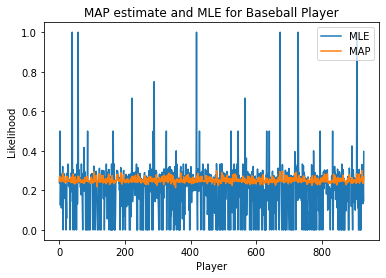

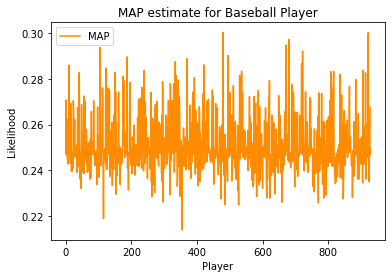

In [6]:
x_pos = np.arange(len(MAP))
plt.plot(x_pos, df['Batting_avg (MLE)'], label='MLE')
plt.plot(x_pos, MAP, label = 'MAP')
plt.xlabel("Player")
plt.ylabel("Likelihood")
plt.title("MAP estimate and MLE for Baseball Player")
plt.legend()
plt.show()

#MAP enhanced
plt.plot(x_pos, MAP, label = 'MAP', color = 'darkorange')
plt.xlabel("Player")
plt.ylabel("Likelihood")
plt.title("MAP estimate for Baseball Player")
plt.legend()
plt.show()

### Plot of MAP with uninformed prior

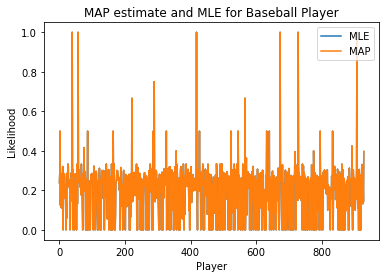

In [7]:
x_pos = np.arange(len(MAP2))
plt.plot(x_pos, df['Batting_avg (MLE)'], label='MLE')
plt.plot(x_pos, MAP2, label = 'MAP')
plt.xlabel("Player")
plt.ylabel("Likelihood")
plt.title("MAP estimate and MLE for Baseball Player")
plt.legend()
plt.show()

### Comments

Maximum Likelihood Estimation(MLE) and Maximum a posteriori (MAP) are both method of estimating parameters of statistical models. The first method that was used to estimate the prob of hit is the MLE. `MLE is given as the sum of total hits/ total number of attempts.` We're assuming the hit probability of the baseball player as a Binomial model with successful hit probability $\theta$. With this we can calculate the hit probability of any given player. We will be checking the likelihood of $\theta$ based on the given data. If we plot the likelihood and the take derivate at the point that gives the highest likelihood  we can observe that the value of $\theta$ that maximizes the likelihood is $\frac {N_H}{N}$.

But MLE is only reliable when the sample size that is observed is very large. When the sample size is low, another method called MAP can be used. MAP assumes we have some prior knowledge called prior probability.Now we would want to find the theta that would maximize the probability and it can be found out from the prior probability and the observed data. Maximizing this would give us the MAP estimation $argmax_\theta = P(\theta | D)$ ,where D is the given data. 

To compute MAP we need to make use of the baye's theorem.
$$ P(\theta | D) = \frac{P( D | \theta) P(\theta)}{P(D)} $$
Here the posterior probability $P(\theta | D) $ is equal to the likelihood * prior probability. 

We choose a beta distribution for the prior, since its a conjugate prior of binomial distribution. 

Two case have been shown above. One where the there is an informational prior and one where there is an uninformational prior. 

- In the case where is an uninformational prior or the the prior is a uniform prior, the MLE and the MAP would be the same. As seen from the third figure the the MAP point estimates are the same as the MLE point estimates. The hit probability is exactly the same in the case where there is prior information
- In the case where there is an informational prior, there is more evidence for the posterior distribution and the variance will become less. As seen from the figure 1, the variance of the MAP estimate is smaller than the variance of the MLE estimate. There is more evidence/likelihood for the mean of the distribution to be closer to the mean of the data. 

Also in cases when the sample size is very large, beta and alpha becomes negligible compared to `$N_H and N$` and thus MLE becomes the same as MAP